In [3]:
frameworks = ['py-flask', "feathers", "nest", "express", "adonis", "hapi", "nest-fastify", "fastify", "go-gin"]
frameworks_plot = ['Flask (Python)', "Feathers.js", "NestJS (Express)", "Express", "Adonis.js", "Hapi", "NestJS (Fastify)", "Fastify", "Gin (Golang)"]

tests = ["static", "fib", "redis", "validation", "error"]
tests_plot = ["Static JSON", "Fibonacci", "Redis", "Query validation", "Error"]


runs = 10
intervals = 40


In [4]:
import numpy as np

reqs = np.zeros((len(frameworks), len(tests), runs))
reqs_timeseries = np.empty((len(frameworks), len(tests), runs, intervals))

for framework in range(len(frameworks)):
    for test in range(len(tests)):
        for run in range(1, runs+1):
            file_name="res_" + frameworks[framework] + "_" + tests[test] + "_" + str(run)
            
            file1 = open(file_name, 'r')
            count = 0

            while True:
                count += 1

                line = file1.readline()
                
                if line.startswith("Requests/sec:"):
                    reqs[framework][test][run - 1] = float(line.split()[1])
                
                if line.startswith("Request counts time series (interval = 250ms)"):
                    for i in range(intervals):
                        val = int(file1.readline().strip())
                        reqs_timeseries[framework][test][run - 1][i] = val
                    break

                if not line:
                    break

            file1.close()
            
# print results of py-flask - static
print(reqs[0][0][:])
# print timeseries of the first run of py-flask during the static test
print(reqs_timeseries[0][0][0][:])

[2832.13 2837.84 2716.77 2798.4  2801.51 2872.6  2768.79 2811.35 2763.4
 2728.62]
[702. 701. 707. 706. 705. 706. 707. 707. 706. 708. 707. 707. 708. 708.
 709. 707. 708. 708. 708. 723. 708. 698. 712. 725. 708. 707. 695. 711.
 725. 709. 709. 709. 709. 710. 709. 709. 710. 709. 710. 709.]


In [5]:
reqs_mean = reqs.mean(axis=(2))
#print(reqs_mean)
reqs_std = reqs.std(axis=(2))
#print(reqs_std)

#print(reqs_mean[:][0])

reqs_timeseries_mean = reqs_timeseries.mean(axis=(2))
reqs_timeseries_std = reqs_timeseries.std(axis=(2))
#print(reqs_timeseries_mean[0][0])
#print(reqs_timeseries_std[0][0])

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2

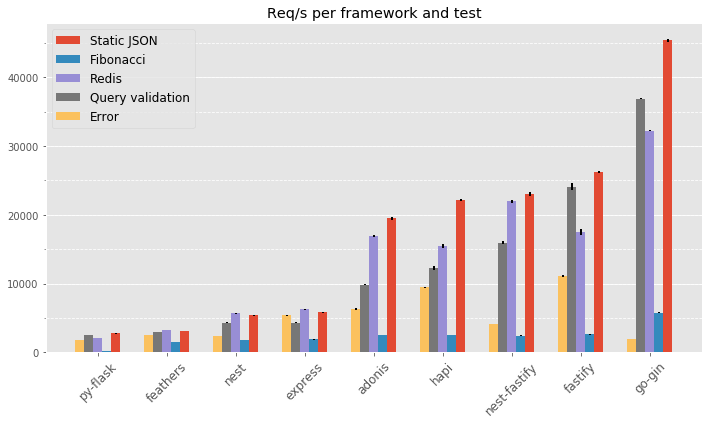

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 0.65
x = np.arange(len(frameworks))

for test in range(5):
    r = ax.bar(x + width/2 - width/10 - (width/5 * test), reqs_mean[:,test], width/5, label=tests_plot[test], yerr=reqs_std[:,test])

    
major_ticks = np.arange(0, 50000, 10000)
minor_ticks = np.arange(0, 50000, 5000)
    
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
    
ax.set_title('Req/s per framework and test')
ax.set_xticks(x)
ax.set_xticklabels(frameworks, rotation=45, fontsize=12)
ax.legend(fontsize=12)
plt.grid()
ax.xaxis.grid(False)
ax.yaxis.grid(b=True, which='major', linestyle='-')
ax.yaxis.grid(b=True, which='minor', linestyle='--')

fig.tight_layout()

plt.savefig('./graphs/bar.png', bbox_inches='tight', dpi=180)

plt.show()

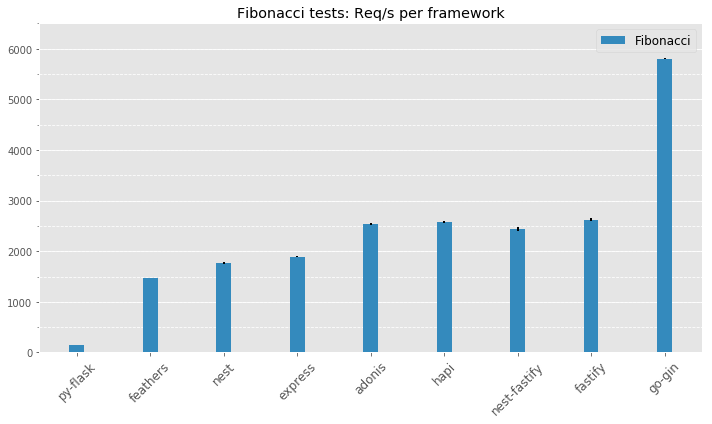

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 1
x = np.arange(9)

major_ticks = np.arange(0, 50000, 1000)
minor_ticks = np.arange(0, 50000, 500)

for test in range(1,2):
    r = ax.bar(x, reqs_mean[:,test], width/5, label=tests_plot[test], yerr=reqs_std[:,test], color="#348abd")

ax.set_title('Fibonacci tests: Req/s per framework')
ax.set_xticks(x)
ax.set_xticklabels(frameworks, rotation=45, fontsize=12)
ax.legend(fontsize=12)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.xaxis.grid(False)
ax.set_ybound(lower=0, upper=6500)
ax.yaxis.grid(b=True, which='major', linestyle='-')
ax.yaxis.grid(b=True, which='minor', linestyle='--')

fig.tight_layout()

plt.savefig('./graphs/fib-bar.png', bbox_inches='tight', dpi=180)

plt.show()

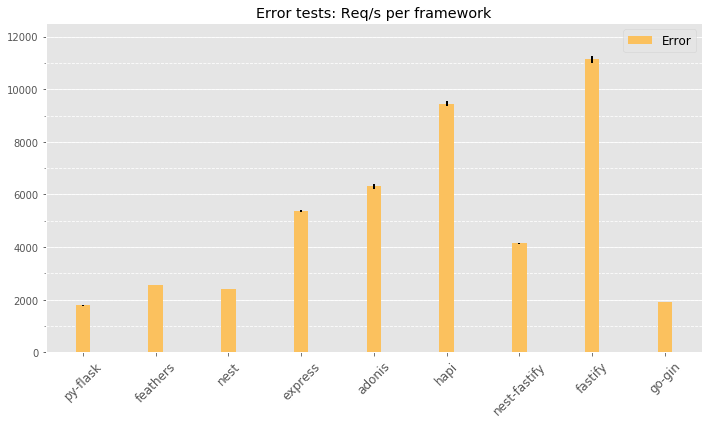

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 1
x = np.arange(9)

for test in range(4,5):
    r = ax.bar(x, reqs_mean[:,test], width/5, label=tests_plot[test], yerr=reqs_std[:,test], color="#fbc15e")

major_ticks = np.arange(0, 50000, 2000)
minor_ticks = np.arange(0, 50000, 1000)
    
ax.set_title('Error tests: Req/s per framework')
ax.set_xticks(x)
ax.set_xticklabels(frameworks, rotation=45, fontsize=12)
ax.legend(fontsize=12)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.xaxis.grid(False)
ax.set_ybound(lower=0, upper=12500)
ax.yaxis.grid(b=True, which='major', linestyle='-')
ax.yaxis.grid(b=True, which='minor', linestyle='--')

fig.tight_layout()

plt.savefig('./graphs/error-bar.png', bbox_inches='tight', dpi=180)

plt.show()

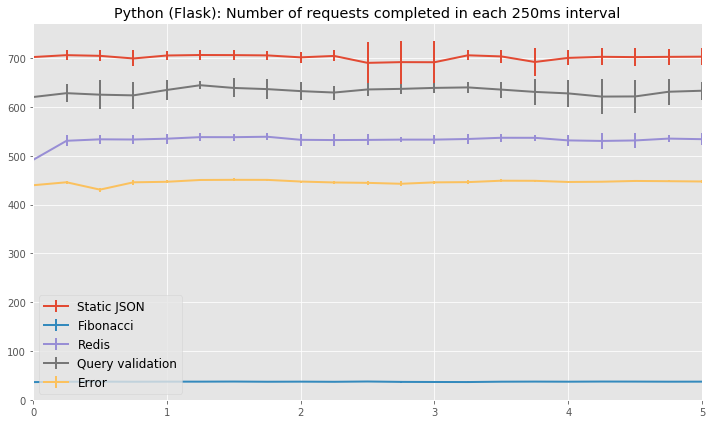

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 0.65
x = np.arange(0, 10, 0.25)
x_label = np.arange(0, 6)


for test in range(len(tests)):
    r = ax.errorbar(x, reqs_timeseries_mean[0,test,:], label=tests_plot[test], yerr=reqs_timeseries_std[0,test,:])

ax.set_title('Python (Flask): Number of requests completed in each 250ms interval')
ax.set_xticks(x_label)
ax.set_xticklabels(x_label)
ax.set_xbound(lower=0, upper=5)
ax.set_ybound(lower=0)
ax.legend(fontsize=12)

fig.tight_layout()

plt.savefig('./graphs/flask-timeseries.png', bbox_inches='tight', dpi=180)

plt.show()

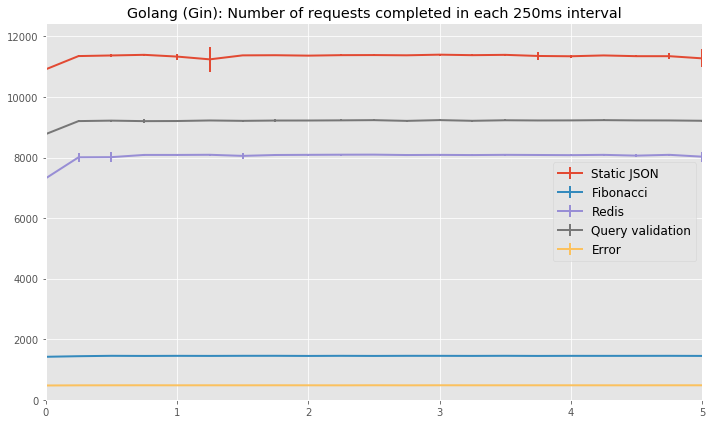

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 0.65
x = np.arange(0, 10, 0.25)
x_label = np.arange(0, 6)

framework = 8

for test in range(len(tests)):
    r = ax.errorbar(x, reqs_timeseries_mean[framework,test,:], label=tests_plot[test], yerr=reqs_timeseries_std[framework,test,:])

ax.set_title('Golang (Gin): Number of requests completed in each 250ms interval')
ax.set_xticks(x_label)
ax.set_xticklabels(x_label)
ax.set_xbound(lower=0, upper=5)
ax.set_ybound(lower=0)
ax.legend(fontsize=12)

fig.tight_layout()

plt.savefig('./graphs/golang-timeseries.png', bbox_inches='tight', dpi=180)

plt.show()

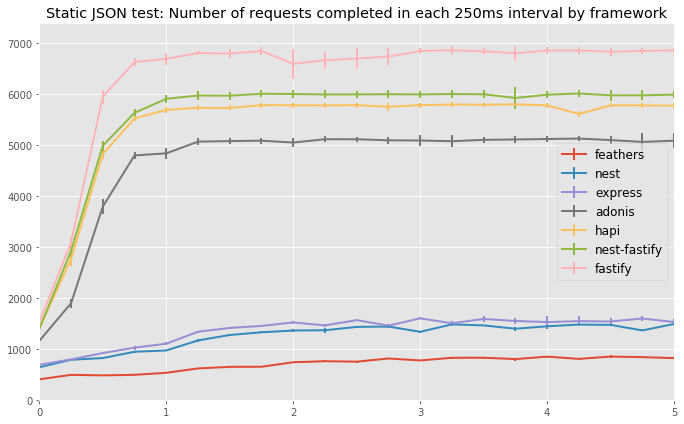

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 0.65
x = np.arange(0, 10, 0.25)
x_label = np.arange(0, 6)

test = 0

for framework in range(1,8):
    r = ax.errorbar(x, reqs_timeseries_mean[framework,test,:], label=frameworks[framework], yerr=reqs_timeseries_std[framework,test,:])


ax.set_title('Static JSON test: Number of requests completed in each 250ms interval by framework')
ax.set_xticks(x_label)
ax.set_xticklabels(x_label)
ax.set_xbound(lower=0, upper=5)
ax.set_ybound(lower=0)
ax.legend(fontsize=12)

fig.tight_layout()

plt.savefig('./graphs/json-timeseries.png', bbox_inches='tight', dpi=180)

plt.show()

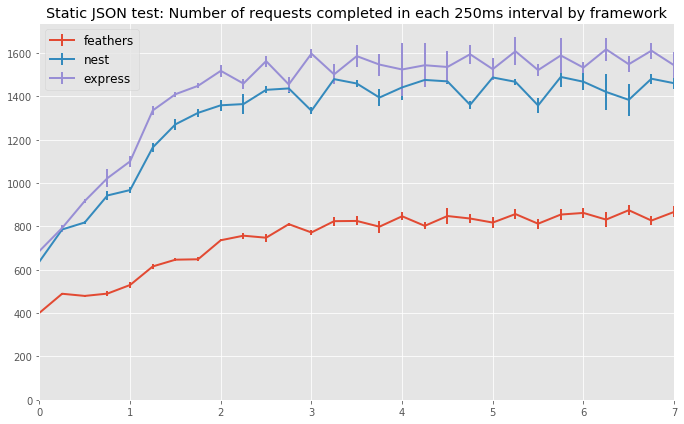

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 0.65
x = np.arange(0, 10, 0.25)
x_label = np.arange(0, 8)

test = 0

for framework in range(1,4):
    r = ax.errorbar(x, reqs_timeseries_mean[framework,test,:], label=frameworks[framework], yerr=reqs_timeseries_std[framework,test,:])

ax.set_title('Static JSON test: Number of requests completed in each 250ms interval by framework')
ax.set_xticks(x_label)
ax.set_xticklabels(x_label)
ax.set_xbound(lower=0, upper=7)
ax.set_ybound(lower=0)
ax.legend(fontsize=12)

fig.tight_layout()

plt.savefig('./graphs/json-slow-timeseries.png', bbox_inches='tight', dpi=180)

plt.show()

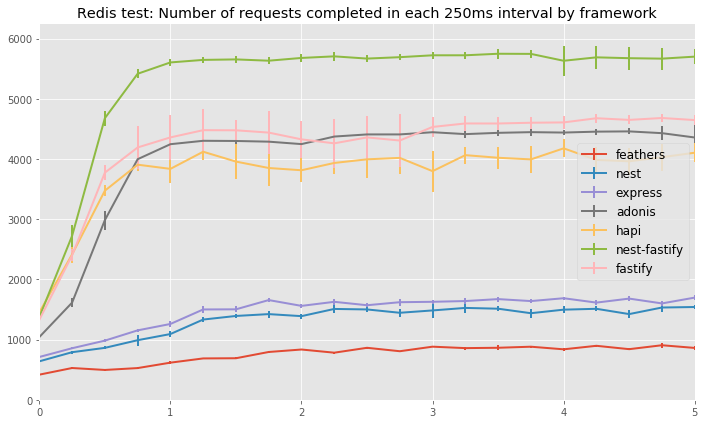

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 0.65
x = np.arange(0, 10, 0.25)
x_label = np.arange(0, 6)

test = 2

for framework in range(1,8):
    r = ax.errorbar(x, reqs_timeseries_mean[framework,test,:], label=frameworks[framework], yerr=reqs_timeseries_std[framework,test,:])

    # ax.bar_label(r, padding=3)

ax.set_title('Redis test: Number of requests completed in each 250ms interval by framework')
ax.set_xticks(x_label)
ax.set_xticklabels(x_label)
ax.set_xbound(lower=0, upper=5)
ax.set_ybound(lower=0)
ax.legend(fontsize=12)

fig.tight_layout()

plt.savefig('./graphs/redis-timeseries.png', bbox_inches='tight', dpi=180)

plt.show()

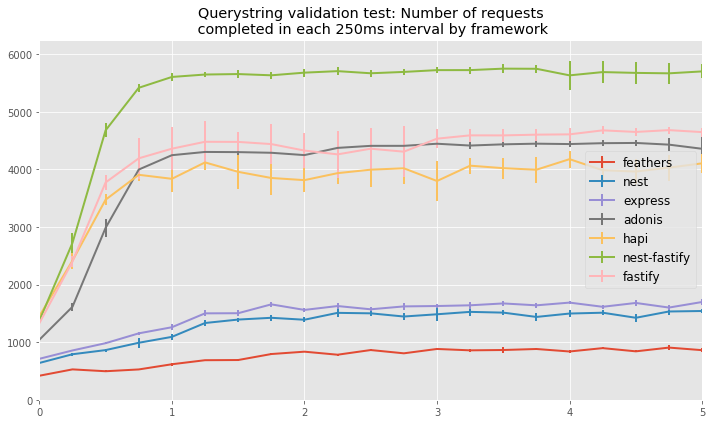

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 0.65
x = np.arange(0, 10, 0.25)
x_label = np.arange(0, 6)

test = 2

for framework in range(1,8):
    r = ax.errorbar(x, reqs_timeseries_mean[framework,test,:], label=frameworks[framework], yerr=reqs_timeseries_std[framework,test,:])

    # ax.bar_label(r, padding=3)

ax.set_title('Querystring validation test: Number of requests\n completed in each 250ms interval by framework')
ax.set_xticks(x_label)
ax.set_xticklabels(x_label)
ax.set_xbound(lower=0, upper=5)
ax.set_ybound(lower=0)
ax.legend(fontsize=12)

fig.tight_layout()

plt.savefig('./graphs/querystring-timeseries.png', bbox_inches='tight', dpi=180)

plt.show()

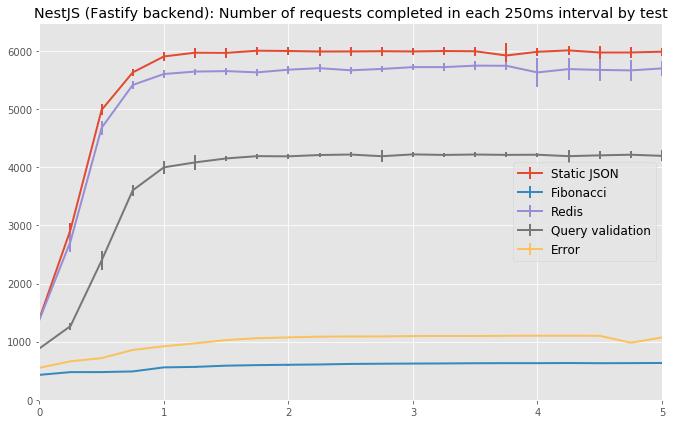

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('ggplot')

width = 0.65
x = np.arange(0, 10, 0.25)
x_label = np.arange(0, 6)


for test in range(len(tests)):
    r = ax.errorbar(x, reqs_timeseries_mean[6,test,:], label=tests_plot[test], yerr=reqs_timeseries_std[6,test,:])

ax.set_title('NestJS (Fastify backend): Number of requests completed in each 250ms interval by test')
ax.set_xticks(x_label)
ax.set_xticklabels(x_label)
ax.set_xbound(lower=0, upper=5)
ax.set_ybound(lower=0)
ax.legend(fontsize=12)

fig.tight_layout()

plt.savefig('./graphs/nestjs-timeseries.png', bbox_inches='tight', dpi=180)

plt.show()